##  Regresja liniowa

Regresja liniowa to tworzenie modeli przedstawiających wielkość, której wartość chcemy przewidzieć (zmienna zależna) jako kombinację liniową predyktorów (zmiennych zależnych).

Struktura modelu ma postać

$$\tilde{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

lub w formie macierzowej 

$$\tilde{\mathbf{y}} = \mathbf{[1\  X ]} \beta$$

gdzie wektor wartości zmiennych zależnych jest przewidywany na podstawie macierzy danych i wektora współczynników $\beta$.

Współczynnik $\beta_0$ w nomentkalturze anglojęzycznej jest nazywany *intercept* ponieważ jest to punkt przecięcia się z osią $y$ gdy wszystkie predyktory są równe 0.

Aby wyznaczyć parametry modelu liniowego potrzebujemy wektora danych uczących, tj. znanych nam wartości zmiennej zależnej  $\mathbf{y}$ oraz odpowiadająxcej mu macierzy predyktorów $\mathbf{X}$. Macierz predyktorów nosi nazwę *design matrix*, i bardzo użytyeczne do jej wyznaczenia (w oparciu o dane w forme dataframe) jest pakiet [patsy](https://patsy.readthedocs.io/en/latest/quickstart.html), a w szczególności funkcja ```dmatrices```.


Model regresyjny ma mocne umocowanie statystyczne, jednak w ramach zajęć będziemy traktować go machinistycznie jak jedną z metod uczenia maszynowego. Do tworzenia takich modeli służy klasa ```LinearRegression```

Do analizy regresji liniowej wykorzystywać będziemy pakiet ```scikit-learn``` oraz zawarte w nim klasy, głównie w modułach ```linear_model```, ```metrics``` oraz ```model_selection```. 

### Dane uczące i dane testowe

Zazwyczaj rozwiązując problem nie mamy dostępu do dodatkowych danych testowych uzupełniających nasze dane uczące. Dlatego też, popularną praktyką jest podzielenie posiadanego zbioru danych w sposób losowy na dwa zbiory: uczący i testowy. Do tego służy funkcja ```train_test_split``` z modułu ```model_selection```. 



### Zadanie 1
Na podstawie danych zawartych w pliku SCORES.csv wykonaj i oceń regresję liniową, gdzie Twoją daną niezależną (predyktorem) będą godziny poświęcone na przygotowanie, a wynikową uzyskane punkty. Wykonanie zadania powinno składać się z następujących kroków:
1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytaj dane z pliku SCORES.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Wykonaj wstępny wykres uzyskanych danych (typu "scatter")
4. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zaleznych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (30%)
5. Utwróz model regresji liniowej za pomocą sklearn.
6. Wypisz i przeanalizuj wyliczone wskaźniki dla modelu: coef_ oraz intercept_. Czym one są i do czego służą?
7. Wykorzystając stworozny model dokonaj predykcji dla części testowej X. Porównaj wynik (y_pred) z posiadanymi danymi (y_test).
8. Wykonaj wykres konfrontujący dane testowe (X_test, y_test; typu "scatter") oraz predykcje (X_test, y_pred; linia prosta)
9. Dokonaj walidacji uzyskanych predykcji wykorzystując metryki: średni błąd bezwzględny (Mean Absolute Error), błąd średniokwadratowy (Mean Squared Error) oraz pierwiastek błędu średniokwadratowego (Root Mean Squared Error).

Następnie utworzony skrypt wykorzystaj na danych zawartych w SBP.csv, gdzie predyktorem będzie wiek, a wynikiem ciśnienie (SBP). Czy uzyskane wyniki z modelu są równie zadowalające?

In [1]:
# 1)
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report
from sklearn.model_selection import train_test_split

# 2)
df_scores = pd.read_csv('SCORES.csv')
df_scores.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


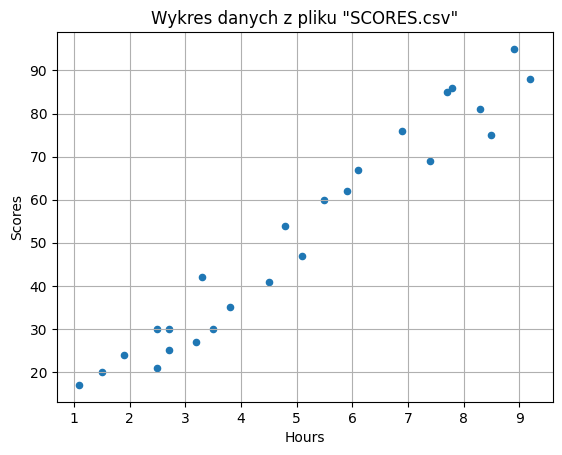

In [2]:
# 3)
def show_points_on_plot(df, x, y, file):
    df.plot.scatter(x=f'{x}', y=f'{y}',
    title=f'Wykres danych z pliku "{file}.csv"', grid=True)
    plt.show()

show_points_on_plot(df_scores, 'Hours', 'Scores', 'SCORES')

In [3]:
# 4, 5, 6)
def train_points(df, xlabel, ylabel):
    x, y = dmatrices(f"{xlabel} ~ {ylabel}", df)
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3, random_state=0)
    reg = LinearRegression().fit(x, y)
    print(f"coef_ - oszacowane współczynniki dla regresji liniowej [{reg.coef_[0]}, {reg.coef_[1]}]")
    print(f"intercept_ - wyrażenie niezależne w modelu liniowym {reg.intercept_}")
    return x_train, x_test, y_train, y_test, reg

x_train, x_test, y_train, y_test, reg = train_points(df_scores, 'Hours', 'Scores')

coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [9.77580339]]
intercept_ - wyrażenie niezależne w modelu liniowym [1.         2.48367341]


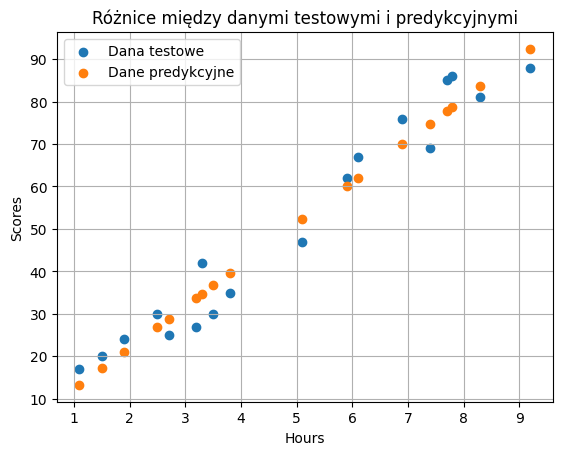

In [4]:
# 7)
def show_different_points(reg, x_test, y_test, xlabel, ylabel):
    y_prediction = reg.predict(x_test)
    plt.scatter(x_test, y_test[:, 1])
    plt.scatter(x_test, y_prediction[:, 1])
    plt.title('Różnice między danymi testowymi i predykcyjnymi')
    plt.xlabel(f'{xlabel}')
    plt.ylabel(f'{ylabel}')
    plt.legend(['Dana testowe', 'Dane predykcyjne'])
    plt.grid()
    plt.show()

show_different_points(reg, x_test, y_test, 'Hours', 'Scores')

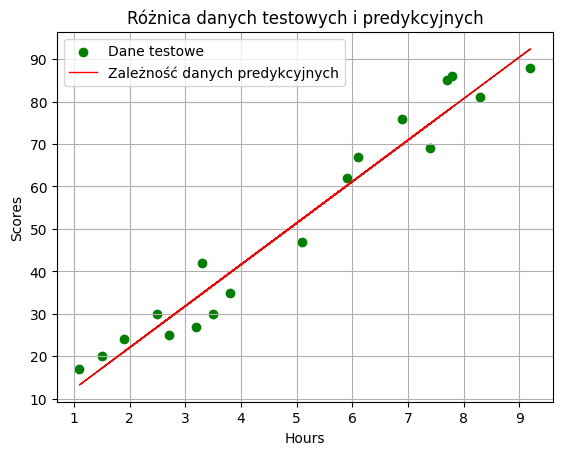

In [5]:
# 8)
def show_different_points_and_line(reg, x_test, y_test, xlabel, ylabel):
    y_prediction = reg.predict(x_test)
    fig, ax = plt.subplots()
    ax.scatter(x_test, y_test[:, 1], color='green')
    ax.plot(x_test, y_prediction[:, 1], color='red', linewidth=1)
    ax.grid()
    ax.set_title('Różnica danych testowych i predykcyjnych')
    ax.set_xlabel(f'{xlabel}')
    ax.set_ylabel(f'{ylabel}')
    ax.legend(['Dane testowe', 'Zależność danych predykcyjnych'])
    plt.show()

show_different_points_and_line(reg, x_test, y_test, 'Hours', 'Scores')

In [6]:
# 9)
def print_statistics(y_test, y_prediction):
    print(f"Średni błąd bezwzględny: {mean_absolute_error(y_test, y_prediction):.3f}")
    print(f"Błąd średniokwadratowy: {mean_squared_error(y_test, y_prediction, squared=False):.3f}")
    print(f"Pierwiastek błędu średniokwadratowego: {mean_squared_error(y_test, y_prediction, squared=True):.3f}")

y_prediction = reg.predict(x_test)
print_statistics(y_test, y_prediction)

Średni błąd bezwzględny: 2.427
Błąd średniokwadratowy: 2.577
Pierwiastek błędu średniokwadratowego: 13.287


#### Powtórzenie zadań dla danych z pliku "SBP.csv"

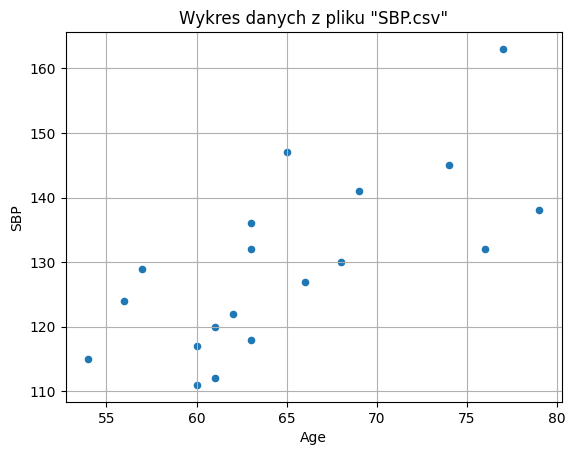

coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [1.31962701]]
intercept_ - wyrażenie niezależne w modelu liniowym [ 1.         43.71475115]


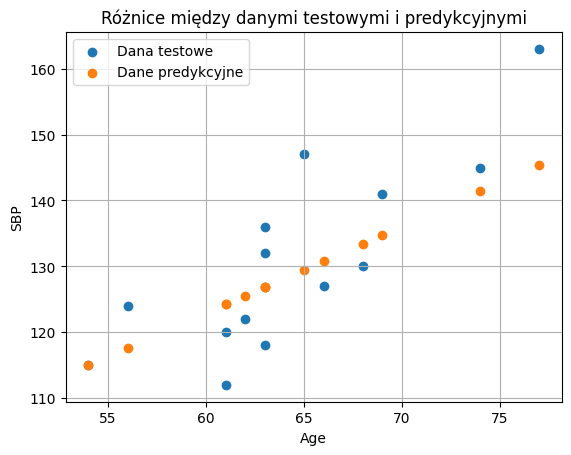

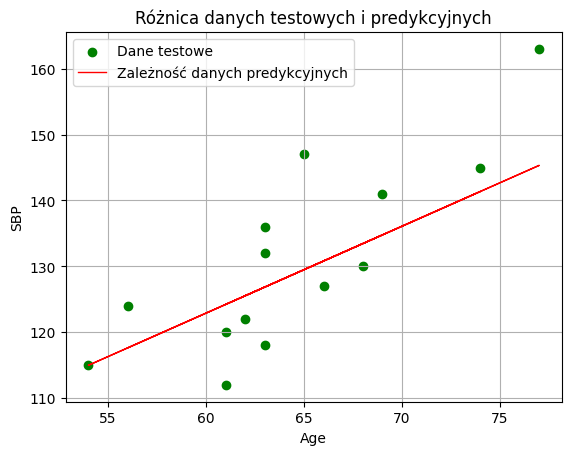

Średni błąd bezwzględny: 3.637
Błąd średniokwadratowy: 4.444
Pierwiastek błędu średniokwadratowego: 39.503


In [7]:
# 2)
df_sbp = pd.read_csv('SBP.csv')
df_sbp.head(5)

# 3)
show_points_on_plot(df_sbp, 'Age', 'SBP', 'SBP')

# 4, 5, 6)
x_train, x_test, y_train, y_test, reg = train_points(df_sbp, 'Age', 'SBP')

# 7)
show_different_points(reg, x_test, y_test, 'Age', 'SBP')

# 8)
show_different_points_and_line(reg, x_test, y_test, 'Age', 'SBP')

# 9)
y_prediction = reg.predict(x_test)
print_statistics(y_test, y_prediction)

##### Uzyskane wyniki nie są satysfakcjonujące, jednak wynika to z dużej różnorodności punktów testowych.

### Zadanie 2
Na podstawie danych zawartych w pliku PETROL.csv wykonaj i oceń regresję liniową. Jako daną zależną wykorzystaj zużycie paliwa, a pozostałe - jako predyktory. Wykonanie zadania powinno składać się z kroków podobnych do tych z zadania poprzedniego.

Czy uzyskane wyniki predykcji modelu są dobre? Co mogło mieć pozytywny/negatywny wpływ na taki wynik?

In [14]:
# 2)
df_petrol = pd.read_csv('./PETROL.csv')
df_petrol.head(5)

,Podatek_paliwowy,Sredni_przychod,Utwardzone_autostrady,Procent_ludnosci_z_prawem_jazdy,Zuzycie_paliwa
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


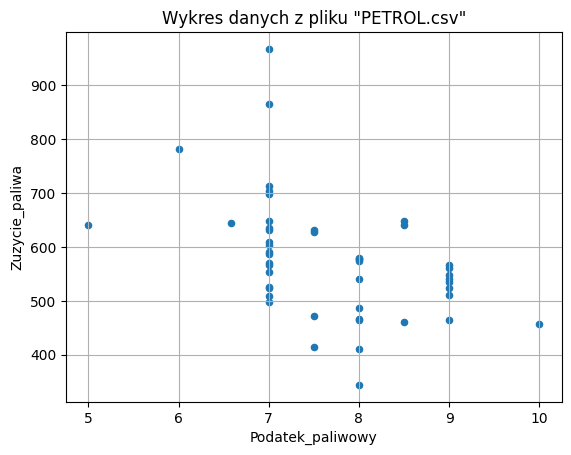

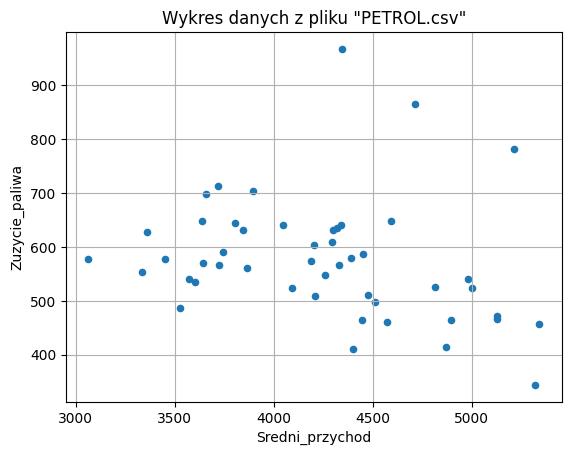

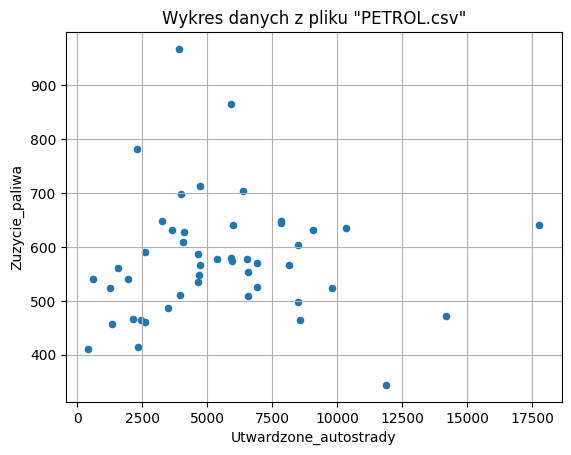

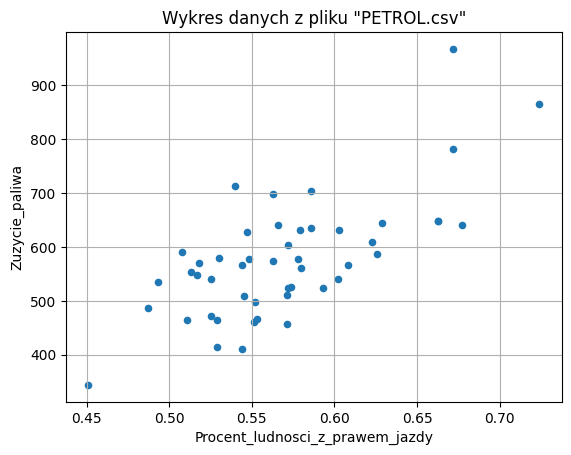

In [18]:
# 3)
title = 'PETROL'
ylabel = 'Zuzycie_paliwa'

show_points_on_plot(df_petrol, 'Podatek_paliwowy', ylabel, title)
show_points_on_plot(df_petrol, 'Sredni_przychod', ylabel, title)
show_points_on_plot(df_petrol, 'Utwardzone_autostrady', ylabel, title)
show_points_on_plot(df_petrol, 'Procent_ludnosci_z_prawem_jazdy', ylabel, title)


In [30]:
# 4, 5, 6)
x_train1, x_test1, y_train1, y_test1, reg1 = train_points(df_petrol, ylabel, 'Podatek_paliwowy')
x_train2, x_test2, y_train2, y_test2, reg2 = train_points(df_petrol, ylabel, 'Sredni_przychod')
x_train3, x_test3, y_train3, y_test3, reg3 = train_points(df_petrol, ylabel, 'Utwardzone_autostrady')
x_train4, x_test4, y_train4, y_test4, reg4 = train_points(df_petrol, ylabel, 'Procent_ludnosci_z_prawem_jazdy')

coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [-0.00383483]]
intercept_ - wyrażenie niezależne w modelu liniowym [1.         9.88015428]
coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [-1.25537545]]
intercept_ - wyrażenie niezależne w modelu liniowym [1.00000000e+00 4.96589728e+03]
coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [0.59422247]]
intercept_ - wyrażenie niezależne w modelu liniowym [1.00000000e+00 5.22268648e+03]
coef_ - oszacowane współczynniki dla regresji liniowej [[0.], [0.00034653]]
intercept_ - wyrażenie niezależne w modelu liniowym [1.         0.37046491]


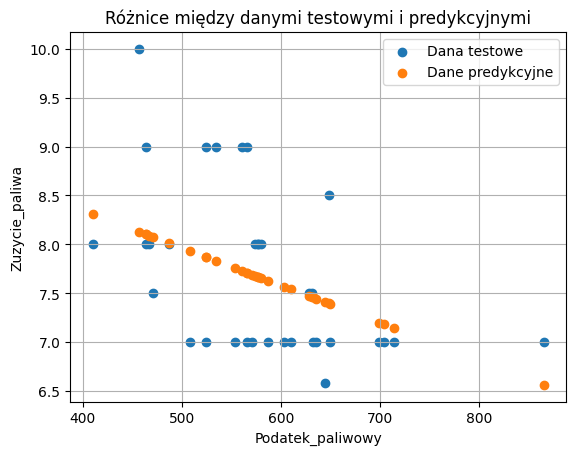

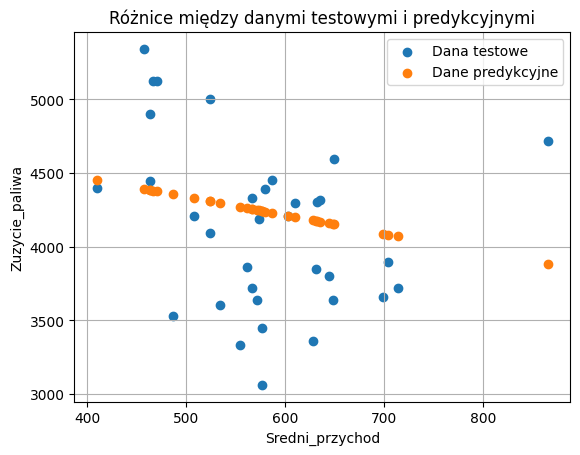

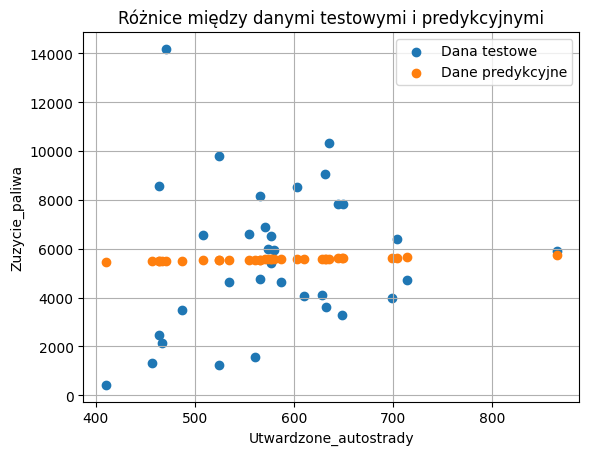

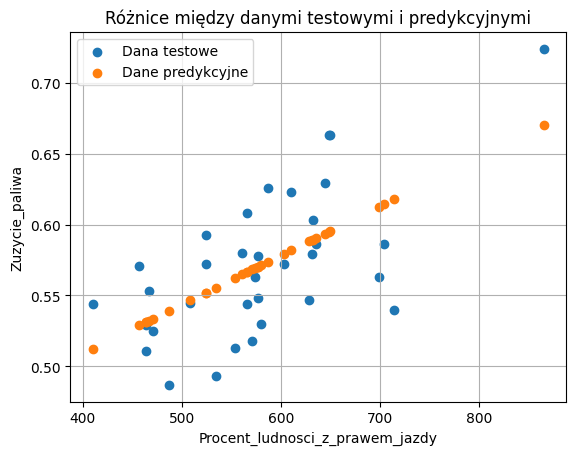

In [39]:
# 7) 
show_different_points(reg1, x_test1, y_test1, 'Podatek_paliwowy', ylabel)
show_different_points(reg2, x_test2, y_test2, 'Sredni_przychod', ylabel)
show_different_points(reg3, x_test3, y_test3, 'Utwardzone_autostrady', ylabel)
show_different_points(reg4, x_test4, y_test4, 'Procent_ludnosci_z_prawem_jazdy', ylabel)

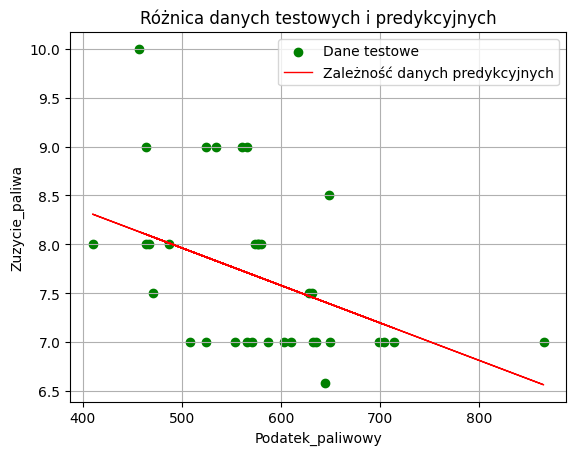

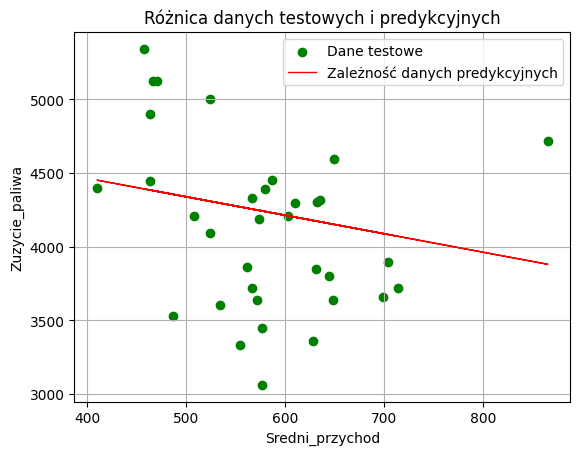

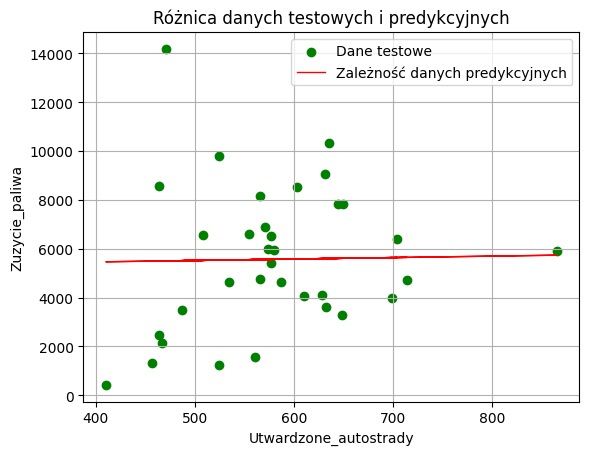

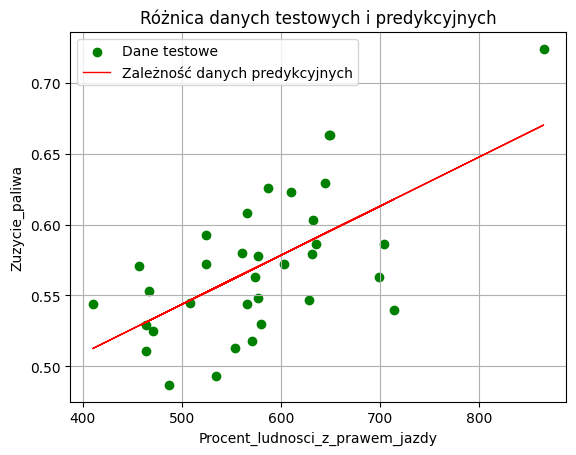

In [41]:
# 8)
show_different_points_and_line(reg1, x_test1, y_test1, 'Podatek_paliwowy', ylabel)
show_different_points_and_line(reg2, x_test2, y_test2, 'Sredni_przychod', ylabel)
show_different_points_and_line(reg3, x_test3, y_test3, 'Utwardzone_autostrady', ylabel)
show_different_points_and_line(reg4, x_test4, y_test4, 'Procent_ludnosci_z_prawem_jazdy', ylabel)

In [51]:
# 9)
print('Dane dla podatku paliwowego:')
y_prediction1 = reg1.predict(x_test1)
print_statistics(y_test1, y_prediction1)
print('----------------------------------')

print('Dane dla sredniego przychodu:')
y_prediction2 = reg2.predict(x_test2)
print_statistics(y_test2, y_prediction2)
print('----------------------------------')

print('Dane dla utwardzania autostrady:')
y_prediction3 = reg3.predict(x_test3)
print_statistics(y_test3, y_prediction3)
print('----------------------------------')

print('Dane dla procentu ludnosci z prawem jazdy:')
y_prediction4 = reg4.predict(x_test4)
print_statistics(y_test4, y_prediction4)

Dane dla podatku paliwowego:
Średni błąd bezwzględny: 0.294
Błąd średniokwadratowy: 0.364
Pierwiastek błędu średniokwadratowego: 0.266
----------------------------------
Dane dla sredniego przychodu:
Średni błąd bezwzględny: 223.963
Błąd średniokwadratowy: 274.618
Pierwiastek błędu średniokwadratowego: 150830.301
----------------------------------
Dane dla utwardzania autostrady:
Średni błąd bezwzględny: 1159.430
Błąd średniokwadratowy: 1459.436
Pierwiastek błędu średniokwadratowego: 4259904.411
----------------------------------
Dane dla procentu ludnosci z prawem jazdy:
Średni błąd bezwzględny: 0.016
Błąd średniokwadratowy: 0.019
Pierwiastek błędu średniokwadratowego: 0.001


#### Błędy są dość spore, jednak wynika to z różnorodnośći danych lub jej zbyt małej ilości.

### Regresja logistyczna

Naturalnym rozwojem modeli linowych, są uogólnione modele liniowe (*generalized linear models*). 

Ich przewodnią ideą jest to, że zamiast reprezentować zmienną zależną jako kombinację liniową niezależnych, staramy się stworzyć model liniowy pewnej funkcji zmiennej zależnej.

$$ f(y) =  \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n$$

wymaga się, aby funkcja ta była odwracalna, dzięki czemu 

$$ y = f^{-1} ( \beta_0 + \beta_1 x_1 + \beta_2 x_2 +\ldots+ \beta_n x_n)$$

Takie przekształcenie stosujemy wtedy, gdy zbiór wartości zmiennej zależnej nie jest całym zbiorem liczb rzeczywistych tylko jest w jakiś sposób ograniczony. Na przykład do przedziału $[0,1]$, do wartości dodatnich lub wartości całkowitych. W tens posób można wybrać funkcję $f$, której dziedziną jest zbiór wartości $y$ zaś obrazem jest zbiór liczb rzeczywistych.

Jedną z takich funkcji jest tzw. funkcja logistyczna, która odpowiada zbiorowi $[0,1]$ przez co często jest wykorzystywana do analizy prawdopodobieństwa przynależności do danej klasy, lub też inaczej jako klasyfikator.

W takiej sytuacji zmienne zależne powinny przyjmować wyłącznie wartości $0$ i $1$ co odpowiada temu czy dany punkt należy do interesującej klasy. Model logistyczny poznwala na określenie estymaty prawdopodobieństwa, czy punkt należy czy nie do danej klasy. 

Do tworzenia modeli logistycznyc służy klasa: ```LogisticRegression```

### Zadanie 3

Na podstawie danych zawartych w pliku HEART.csv wykonaj i oceń regresję logistyczną, gdzie Twoją daną zależną jest kolumna "num". Wykonanie zadania powinno składać się z następujących kroków:

1. Zaimportowanie niezbędnych bibliotek w szczególności tych tworzących modele liniowe z "scikit-learn", a także biblioteki do operacji na danych oraz tworzenia wykresów.
2. Odczytanie danych z pliku HEART.csv. Pomocne w interpretacji danych są metody: head(), describe(), shape.
3. Przetworzenie danych, tj: oznaczenie braku danych ("?") na NaN, usunięcię kolumn zawierających zbyt dużo brakujących danych (3 kolumny), usunięcie wierszy z brakującymi wartościami.
4. Zakoduj niezależne zmienne kategorialne np: jako wartości "dummy", za pomoca metody get_dummies(). Zmienne kategorialne to takie, które reprezentuja przynależność do kategorii. W przypadku naszych odfiltrowanych danych będą to kolumny: cp, restecg, fbs, sex, exang. Jako, że trzy ostatnie już zapisane są w formie 0 i 1 tylko cp i restecg wymagają tej operacji.
5. Dokonaj podziału danych na zbiory danych niezależnych (wejściowe, X) oraz zależnych (wyjściowe, y) dla swojego modelu, a następnie podziel zbiór na dane testowe i treningowe (20%).
6. Utwróz model regresji logistycznej.
7. Oceń wynik za pomocą dostępnych metryk (np: metody związane z modelem czy classification_report() z sklearn)

Możesz również spróbować ustandaryzować dane (np: poprzez skalowanie) po podziale na zbiory treningowy i testowy.

In [130]:
# 2)
df_heart = pd.read_csv('./HEART.csv')
df_heart.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [131]:
# 3)
df_heart.replace("?", np.nan, inplace=True)

for del_column in ['slope', 'ca', 'thal']:
    df_heart.drop(del_column, inplace=True, axis=1)

df_heart.dropna(inplace=True)
df_heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0


In [132]:
# 4)
cp = pd.get_dummies(df_heart['cp'], prefix='cp', drop_first=True)
restecg = pd.get_dummies(df_heart['restecg'], prefix='restecg', drop_first=True)

cols_to_keep = ['sex', 'fbs', 'exang']
dummy_data = df_heart[cols_to_keep].join(cp)
dummy_data = dummy_data.join(restecg)

dummy_data.head(3)

,sex,fbs,exang,cp_2,cp_3,cp_4,restecg_1,restecg_2
0,1,0,0,1,0,0,0,1
1,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0


In [138]:
# 5)
x = dummy_data.loc[:, dummy_data.columns]
y = df_heart['num       ']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.2, random_state=0)

coef_ - oszacowane współczynniki dla regresji liniowej [[ 0.98918667  1.03084802  1.82624327 -1.34531529 -0.33966876  0.85751929
  -0.17303228 -0.37955534]]
intercept_ - wyrażenie niezależne w modelu liniowym [-1.9538927]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       137
           1       0.80      0.62      0.70        72

    accuracy                           0.82       209
   macro avg       0.81      0.77      0.79       209
weighted avg       0.82      0.82      0.81       209



In [140]:
# 6)
logReg = LogisticRegression(random_state=0).fit(x, y)

print(f"coef_ - oszacowane współczynniki dla regresji liniowej {logReg.coef_}")
print(f"intercept_ - wyrażenie niezależne w modelu liniowym {logReg.intercept_}")


coef_ - oszacowane współczynniki dla regresji liniowej [[ 0.98918667  1.03084802  1.82624327 -1.34531529 -0.33966876  0.85751929
  -0.17303228 -0.37955534]]
intercept_ - wyrażenie niezależne w modelu liniowym [-1.9538927]


In [142]:
# 7)
y_predict = logReg.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       137
           1       0.80      0.62      0.70        72

    accuracy                           0.82       209
   macro avg       0.81      0.77      0.79       209
weighted avg       0.82      0.82      0.81       209

